In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
#importing data and treating -1 as null value
train = pd.read_csv('train.csv',delimiter=",", index_col=None, na_values='-1')
test = pd.read_csv('test.csv',delimiter=",", index_col=None, na_values='-1')

In [3]:
train.shape

(347841, 33)

In [4]:
test.shape

(86961, 32)

In [5]:
train.head()

,unique_id,metric1,metric2,metric6,metric3,metric4,metric5,binary_var1,region,sourceMedium,...,page4_top,page4_exits,visited_page4,page5_top,page5_exits,visited_page5,page6_top,page6_exits,visited_page6,target
0,1,4,1,2,5.0,5.0,0.0,0,84e516108956e6e374941043b5f73e86,d3d55c19deb05c118cfed68910a1f6bd,...,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0
1,2,0,1,1,0.0,0.0,100.0,0,185a5eb309e9ba14f65e6486f08b3032,3a987a7bb0a840a40d80e301132f138c,...,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0
2,3,0,1,6,37.2,186.0,0.0,1,84e516108956e6e374941043b5f73e86,d3d55c19deb05c118cfed68910a1f6bd,...,0.0,NaN,0,0.0,NaN,0,30.0,0.0,1,0
3,4,24,1,1,0.0,0.0,100.0,0,185a5eb309e9ba14f65e6486f08b3032,335cceef7d447b13ae8fc7c0e0a7e826,...,0.0,NaN,0,0.0,NaN,0,0.0,1.0,1,0
4,5,0,1,1,0.0,4.0,0.0,0,3a2d6295a828fc1ec5084af382b61e35,335cceef7d447b13ae8fc7c0e0a7e826,...,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0


In [6]:
test.head()

,unique_id,metric1,metric2,metric6,metric3,metric4,metric5,binary_var1,region,sourceMedium,...,visited_page3,page4_top,page4_exits,visited_page4,page5_top,page5_exits,visited_page5,page6_top,page6_exits,visited_page6
0,1,1,1,5,23.250000,93.0,0.0,0,9221413dd904c157938b397753a8b4bb,d3d55c19deb05c118cfed68910a1f6bd,...,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0
1,2,0,1,1,0.000000,0.0,100.0,0,84e516108956e6e374941043b5f73e86,d3d55c19deb05c118cfed68910a1f6bd,...,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0
2,3,4,1,1,0.000000,0.0,100.0,0,6209f257ee6dbb2bb5f5d607191716de,889d84a5edb2e81474150e2e6478162e,...,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0
3,4,0,1,8,45.857143,322.0,0.0,1,84e516108956e6e374941043b5f73e86,d3d55c19deb05c118cfed68910a1f6bd,...,0,0.0,NaN,0,0.0,NaN,0,33.0,0.0,1
4,5,0,1,1,0.000000,0.0,100.0,0,185a5eb309e9ba14f65e6486f08b3032,3eb1c9693343c41091b1cc671e77425e,...,0,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0


In [7]:
train.isnull().any()

unique_id        False
metric1          False
metric2          False
metric6          False
metric3          False
metric4          False
metric5          False
binary_var1      False
region           False
sourceMedium     False
device           False
country          False
dayHourMinute    False
binary_var2      False
page1_top        False
page1_exits       True
visited_page1    False
page2_top        False
page2_exits       True
visited_page2    False
page3_top        False
page3_exits       True
visited_page3    False
page4_top        False
page4_exits       True
visited_page4    False
page5_top        False
page5_exits       True
visited_page5    False
page6_top        False
page6_exits       True
visited_page6    False
target           False
dtype: bool

In [9]:
train.isnull().sum()

unique_id             0
metric1               0
metric2               0
metric6               0
metric3               0
metric4               0
metric5               0
binary_var1           0
region                0
sourceMedium          0
device                0
country               0
dayHourMinute         0
binary_var2           0
page1_top             0
page1_exits      342644
visited_page1         0
page2_top             0
page2_exits      347804
visited_page2         0
page3_top             0
page3_exits      319169
visited_page3         0
page4_top             0
page4_exits      341821
visited_page4         0
page5_top             0
page5_exits      347175
visited_page5         0
page6_top             0
page6_exits      193307
visited_page6         0
target                0
dtype: int64

In [10]:
null_columns=train.columns[train.isnull().any()]
print(null_columns)

Index(['page1_exits', 'page2_exits', 'page3_exits', 'page4_exits',
       'page5_exits', 'page6_exits'],
      dtype='object')


In [11]:
#dropping the columns with null value as those columns have more than 50% values as null
train.drop(null_columns,axis=1,inplace=True)

In [12]:
train.shape

(347841, 27)

In [14]:
train.dtypes

unique_id          int64
metric1            int64
metric2            int64
metric6            int64
metric3          float64
metric4          float64
metric5          float64
binary_var1        int64
region            object
sourceMedium      object
device            object
country           object
dayHourMinute    float64
binary_var2        int64
page1_top        float64
visited_page1      int64
page2_top        float64
visited_page2      int64
page3_top        float64
visited_page3      int64
page4_top        float64
visited_page4      int64
page5_top        float64
visited_page5      int64
page6_top        float64
visited_page6      int64
target             int64
dtype: object

In [15]:
train.target.value_counts()

0    316036
1     31805
Name: target, dtype: int64

In [16]:
# Page1_Visited means whether unique id has visited the page or not => categorical
for col in ['visited_page1', 'visited_page2', 'visited_page3',  'visited_page4', 'visited_page5', 'visited_page6']:
    train[col] = train[col].astype('category')

# Binary_Var contains binary values
for col in ['binary_var1', 'binary_var2']:
    train[col] = train[col].astype('category')

# region/sourceMedium/country/device are also treated categorical
for col in ['region', 'sourceMedium', 'device', 'country']:
    train[col] = train[col].astype('category')

train['target'] = train['target'].astype('category')

In [17]:
train.head()

,unique_id,metric1,metric2,metric6,metric3,metric4,metric5,binary_var1,region,sourceMedium,...,visited_page2,page3_top,visited_page3,page4_top,visited_page4,page5_top,visited_page5,page6_top,visited_page6,target
0,1,4,1,2,5.0,5.0,0.0,0,84e516108956e6e374941043b5f73e86,d3d55c19deb05c118cfed68910a1f6bd,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0
1,2,0,1,1,0.0,0.0,100.0,0,185a5eb309e9ba14f65e6486f08b3032,3a987a7bb0a840a40d80e301132f138c,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0
2,3,0,1,6,37.2,186.0,0.0,1,84e516108956e6e374941043b5f73e86,d3d55c19deb05c118cfed68910a1f6bd,...,0,0.0,0,0.0,0,0.0,0,30.0,1,0
3,4,24,1,1,0.0,0.0,100.0,0,185a5eb309e9ba14f65e6486f08b3032,335cceef7d447b13ae8fc7c0e0a7e826,...,0,0.0,0,0.0,0,0.0,0,0.0,1,0
4,5,0,1,1,0.0,4.0,0.0,0,3a2d6295a828fc1ec5084af382b61e35,335cceef7d447b13ae8fc7c0e0a7e826,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0


In [19]:
train.dtypes

unique_id           int64
metric1             int64
metric2             int64
metric6             int64
metric3           float64
metric4           float64
metric5           float64
binary_var1      category
region           category
sourceMedium     category
device           category
country          category
dayHourMinute     float64
binary_var2      category
page1_top         float64
visited_page1    category
page2_top         float64
visited_page2    category
page3_top         float64
visited_page3    category
page4_top         float64
visited_page4    category
page5_top         float64
visited_page5    category
page6_top         float64
visited_page6    category
target           category
dtype: object

In [20]:
# working with numerical columns
num_cols = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5','metric6', 'page1_top', 'page2_top', 'page3_top', 'page4_top',
           'page5_top', 'page6_top']

num_data = train[num_cols]

In [21]:
num_data.corr()

,metric1,metric2,metric3,metric4,metric5,metric6,page1_top,page2_top,page3_top,page4_top,page5_top,page6_top
metric1,1.000000,-0.008537,0.009634,0.004209,-0.031370,-0.015225,0.001031,-0.000667,0.004716,0.001086,0.002267,0.013038
metric2,-0.008537,1.000000,0.155708,0.166962,-0.098065,0.474780,0.031139,0.017599,0.084436,0.026918,0.013206,0.163855
metric3,0.009634,0.155708,1.000000,0.523589,-0.347091,0.122781,0.059809,0.006426,0.154935,0.048063,0.017685,0.465361
metric4,0.004209,0.166962,0.523589,1.000000,-0.377635,0.505131,0.072670,0.010511,0.187027,0.068701,0.035177,0.371861
metric5,-0.031370,-0.098065,-0.347091,-0.377635,1.000000,-0.297294,-0.034220,-0.003459,-0.091830,-0.040796,-0.012791,-0.228760
metric6,-0.015225,0.474780,0.122781,0.505131,-0.297294,1.000000,0.044048,0.018550,0.100708,0.043128,0.021154,0.167633
page1_top,0.001031,0.031139,0.059809,0.072670,-0.034220,0.044048,1.000000,0.012238,0.043315,0.046827,0.020456,0.014232
page2_top,-0.000667,0.017599,0.006426,0.010511,-0.003459,0.018550,0.012238,1.000000,0.025778,0.001379,-0.000094,0.005923
page3_top,0.004716,0.084436,0.154935,0.187027,-0.091830,0.100708,0.043315,0.025778,1.000000,0.042171,0.014336,0.047500
page4_top,0.001086,0.026918,0.048063,0.068701,-0.040796,0.043128,0.046827,0.001379,0.042171,1.000000,0.017078,0.018260


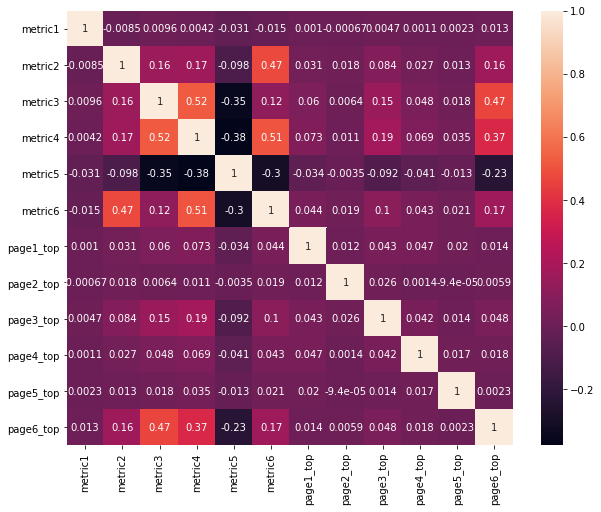

In [24]:
plt.figure(figsize = (10, 8))
sns.heatmap(num_data.corr(),annot=True)
plt.show()

Modelling

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [27]:
def evaluate_model(target_true,target_predicted):
    print("Confusion Matrix: \n", confusion_matrix(target_true,target_predicted))
    print("\nClassification Report: \n",classification_report(target_true,target_predicted))
    print("\nThe Accuracy score is {:.2%}".format(accuracy_score(target_true,target_predicted)))
    print("\nAUC_ROC Score is {:.2%}".format(roc_auc_score(target_true,target_predicted)))

In [28]:
train['metric1_inv'] = np.divide(np.ones_like(train['metric1'])*1.0, train['metric1'])

In [29]:
# Splitting the training data to train and validation sets
X = train[train.columns.difference(['target'])]
Y = train['target']

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30, random_state=42)

In [31]:
X_train.columns

Index(['binary_var1', 'binary_var2', 'country', 'dayHourMinute', 'device',
       'metric1', 'metric1_inv', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'page1_top', 'page2_top', 'page3_top', 'page4_top',
       'page5_top', 'page6_top', 'region', 'sourceMedium', 'unique_id',
       'visited_page1', 'visited_page2', 'visited_page3', 'visited_page4',
       'visited_page5', 'visited_page6'],
      dtype='object')

In [32]:
use_cols = ['binary_var1', 'binary_var2', 'dayHourMinute', 
       #'metric2', 'metric3', 'metric4', 
        'metric5', 'metric6',
       'page2_top', 'page3_top', 'page4_top', 'page5_top', # 'page1_top', 'page6_top',
        #'region', #'sourceMedium', 'device', 'country',
       'visited_page2', 
        'metric1', 
        'visited_page1', 'visited_page3', 'visited_page4', 'visited_page5', 'visited_page6',
           ]

In [33]:
# Random Forests
params = {'max_depth':14,'min_samples_split':3,
          'n_jobs':1, 
          'n_estimators': 700,
          'class_weight':'balanced_subsample'}
forest = RandomForestClassifier(**params)
classifier = forest.fit(X_train[use_cols], Y_train)

# Train
predicted = classifier.predict(X_train[use_cols])
evaluate_model(Y_train,predicted)

Confusion Matrix: 
 [[180425  40707]
 [  3758  18598]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.82      0.89    221132
           1       0.31      0.83      0.46     22356

    accuracy                           0.82    243488
   macro avg       0.65      0.82      0.67    243488
weighted avg       0.92      0.82      0.85    243488


The Accuracy score is 81.74%

AUC_ROC Score is 82.39%


In [34]:
# Predictions on Val set
predicted = classifier.predict(X_val[use_cols])
evaluate_model(Y_val,predicted)

Confusion Matrix: 
 [[77022 17882]
 [ 1971  7478]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89     94904
           1       0.29      0.79      0.43      9449

    accuracy                           0.81    104353
   macro avg       0.63      0.80      0.66    104353
weighted avg       0.91      0.81      0.84    104353


The Accuracy score is 80.98%

AUC_ROC Score is 80.15%
